In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
data = pd.read_csv('gdansk_larger_data.csv')

In [3]:
data.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
2534,gdańsk,2023-07-09,23.1,12.4,18.4,23.1,12.4,18.4,13.0,72.6,...,19.4,8,10.0,2023-07-09T04:22:41,2023-07-09T21:17:56,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"12142099999,12376599999,12136099999,1216009999..."
2535,gdańsk,2023-07-10,21.2,14.1,18.5,21.2,14.1,18.5,14.1,76.3,...,18.1,7,10.0,2023-07-10T04:23:50,2023-07-10T21:17:03,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"12142099999,12376599999,12136099999,1216009999..."
2536,gdańsk,2023-07-11,22.3,15.3,18.5,22.3,15.3,18.5,15.3,82.3,...,13.0,6,10.0,2023-07-11T04:25:00,2023-07-11T21:16:07,0.78,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"12142099999,12376599999,D8078,12136099999,EPGD..."
2537,gdańsk,2023-07-12,26.0,13.0,19.4,26.0,13.0,19.4,14.5,76.2,...,11.4,6,30.0,2023-07-12T04:26:13,2023-07-12T21:15:08,0.81,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"EPGD,AV308"
2538,gdańsk,2023-07-13,22.0,13.0,17.6,22.0,13.0,17.6,13.0,75.9,...,20.0,7,10.0,2023-07-13T04:27:28,2023-07-13T21:14:06,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"EPGD,AV308"


In [4]:
list(data.columns)

['name',
 'datetime',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'severerisk',
 'sunrise',
 'sunset',
 'moonphase',
 'conditions',
 'description',
 'icon',
 'stations']

## Cleaning the data

In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])    
data['datetime'] = data['datetime'].dt.date

## Visualizing the temperature

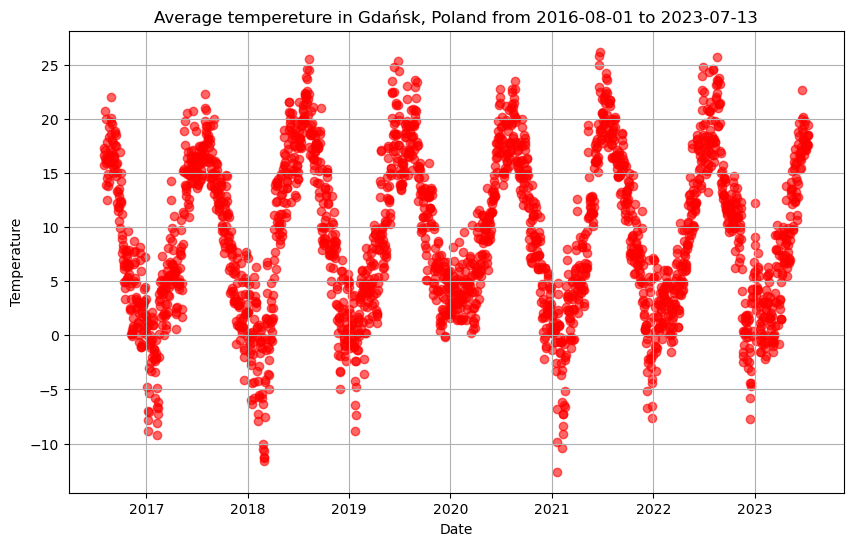

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['datetime'], y=data['temp'], color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title(f"Average tempereture in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}")
plt.grid()
plt.show()

In [7]:
min_feel = data['feelslikemin'].min()
max_feel = data['feelslikemax'].max()
indexofminfeelslike = np.where(data['feelslikemin'] == min_feel)
indexofmaxfeelslike = np.where(data['feelslikemax'] == max_feel)
min_feel_data = data['datetime'][indexofminfeelslike[0][0]]
max_feel_data = data['datetime'][indexofmaxfeelslike[0][0]]

## Visualizing the feels like temperature and the temperature on one plot

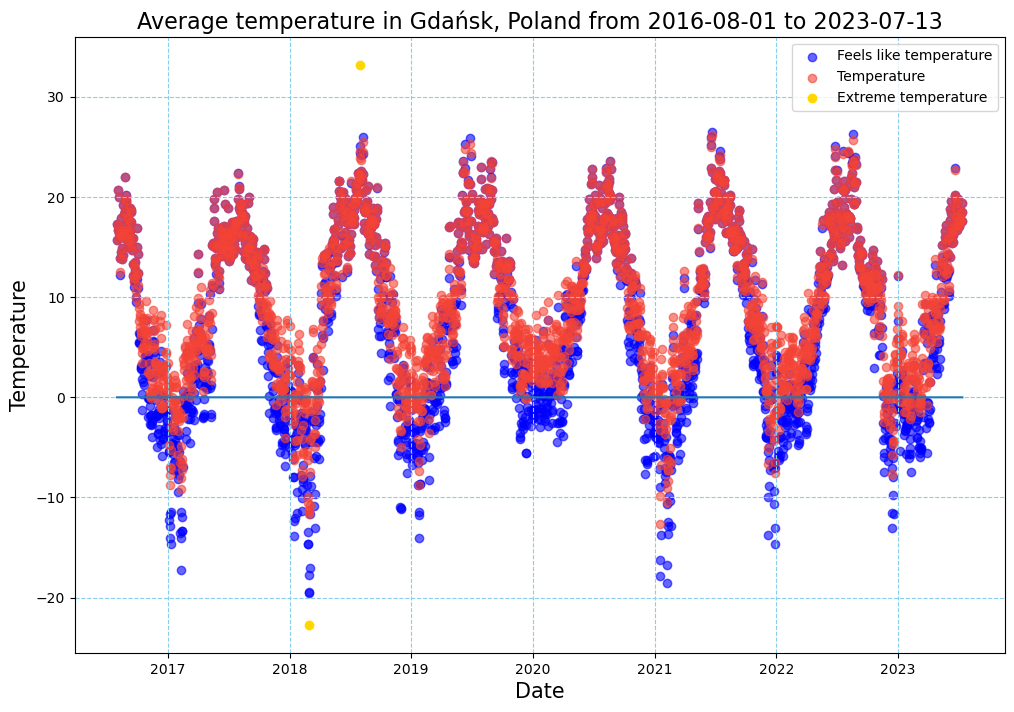

The lowest noted temperature -14.7 / The lowest feels like noted temperature -22.7
The highest noted temperature 32.7 / the highest feels like noted temperature 33.2


In [8]:
extreme_temp = [max_feel, min_feel]
extreme_temp_date = [max_feel_data, min_feel_data]

plt.figure(figsize=(12, 8))
plt.scatter(x=data['datetime'], y=data['feelslike'], color='blue', alpha=0.6, label='Feels like temperature')
plt.scatter(x=data['datetime'], y=data['temp'], color='#F44336', alpha=0.6, label='Temperature')
plt.scatter(x=extreme_temp_date, y=extreme_temp, color='gold', label='Extreme temperature')
sns.lineplot(x=data['datetime'], y=0)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title(f"Average temperature in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.grid(True, linestyle='--', color='skyblue')  # Add gridlines with a dashed line style
plt.legend()

plt.show()

print(f"The lowest noted temperature {data['tempmin'].min()} / The lowest feels like noted temperature {data['feelslikemin'].min()}")
print(f"The highest noted temperature {data['tempmax'].max()} / the highest feels like noted temperature {data['feelslikemax'].max()}")

## Visualzing the chunk of data on a scatter plot 

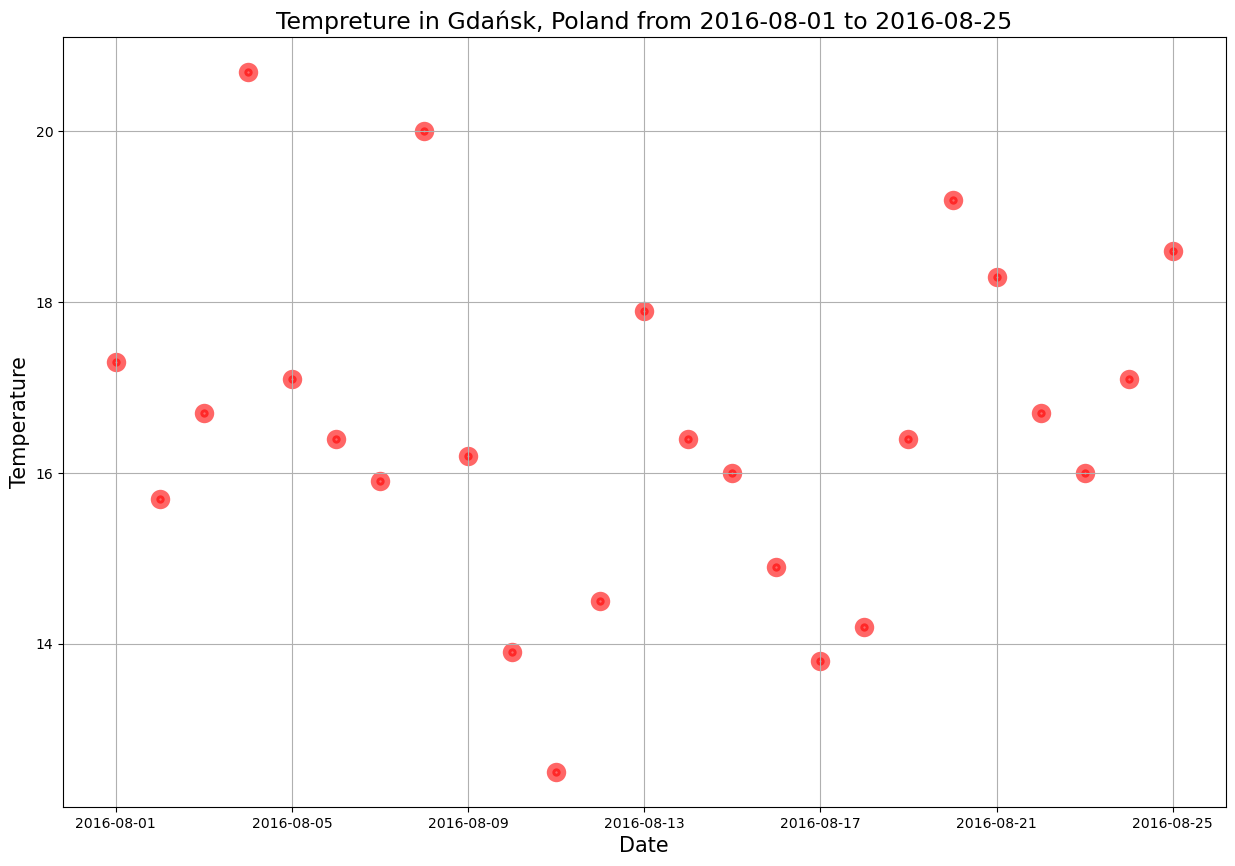

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(x=data['datetime'][:25], y=data['temp'][:25], color='red', alpha=0.6, linewidths=8)
plt.grid()
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title(f"Tempreture in Gdańsk, Poland from {data['datetime'][:25].min()} to {data['datetime'][:25].max()}", fontsize=17)
plt.show()

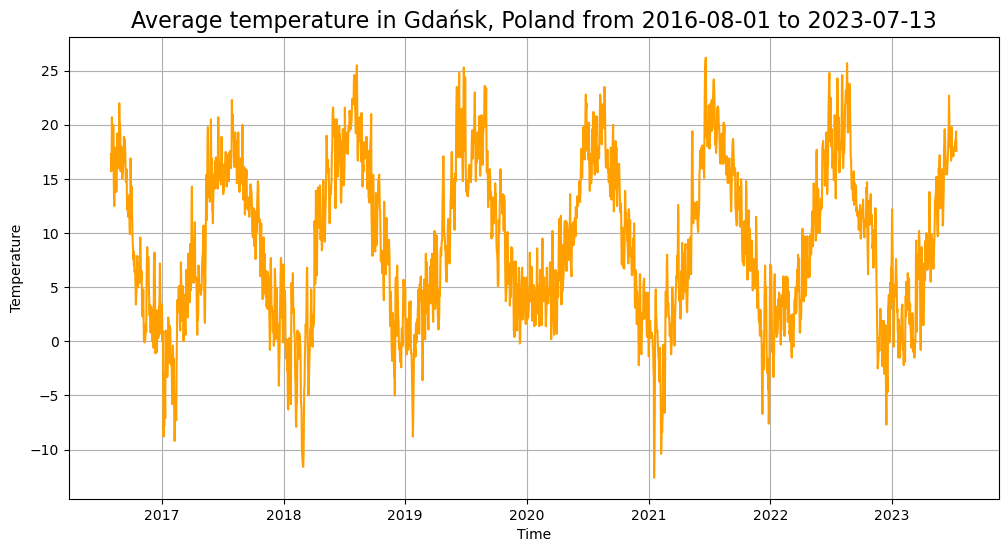

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['datetime'], y=data['temp'], color='#FFA000')
plt.title(f"Average temperature in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid()
plt.show()

## Visualizing rainy days on scatter plot

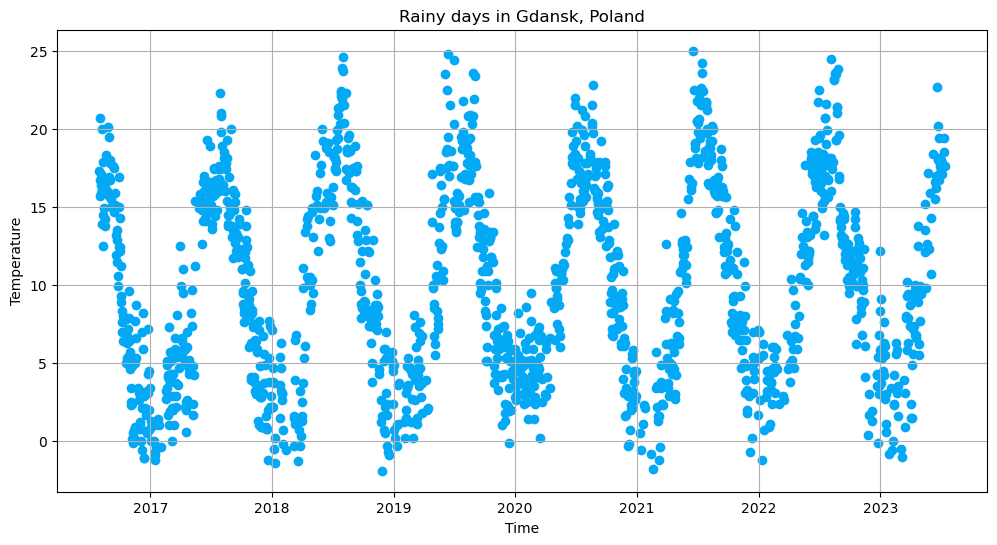

Percentage of rainy days in Gdansk: 61.72%


In [17]:
rain_counter = 0
plt.figure(figsize=(12, 6))
for i in range(len(data)):
    if(data['icon'][i] == 'rain'):
        rain_counter += 1
        plt.scatter(x=data['datetime'][i], y=data['temp'][i], color='#03A9F4')
plt.title('Rainy days in Gdansk, Poland')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid()
plt.show()
print(f'Percentage of rainy days in Gdansk: {round((rain_counter / len(data) * 100), 2)}%')

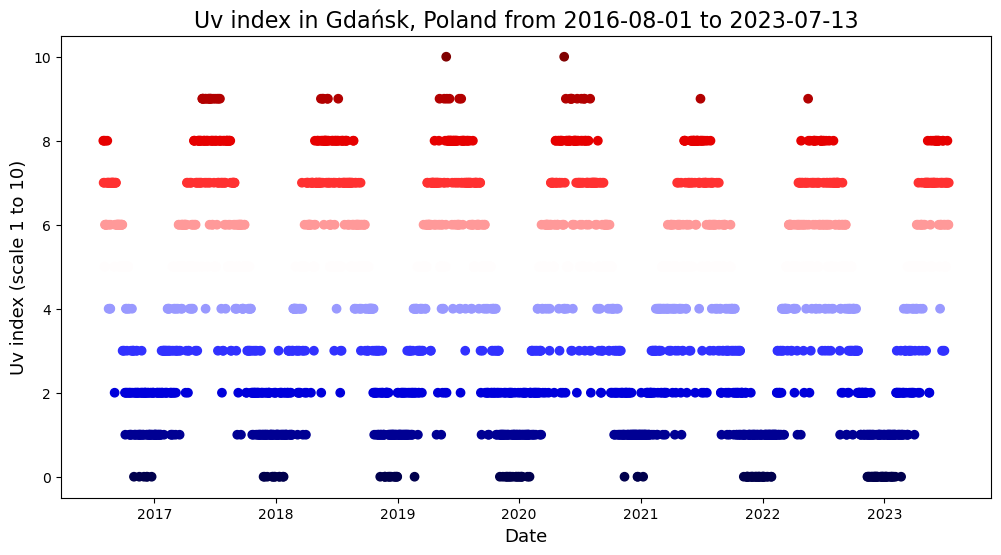

In [24]:
rain_counter = 0
plt.figure(figsize=(12, 6))
plt.scatter(x=data['datetime'], y=data['uvindex'], c=data['uvindex'], cmap='seismic')
plt.title(f"Uv index in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Uv index (scale 1 to 10)', fontsize=13)
plt.show()

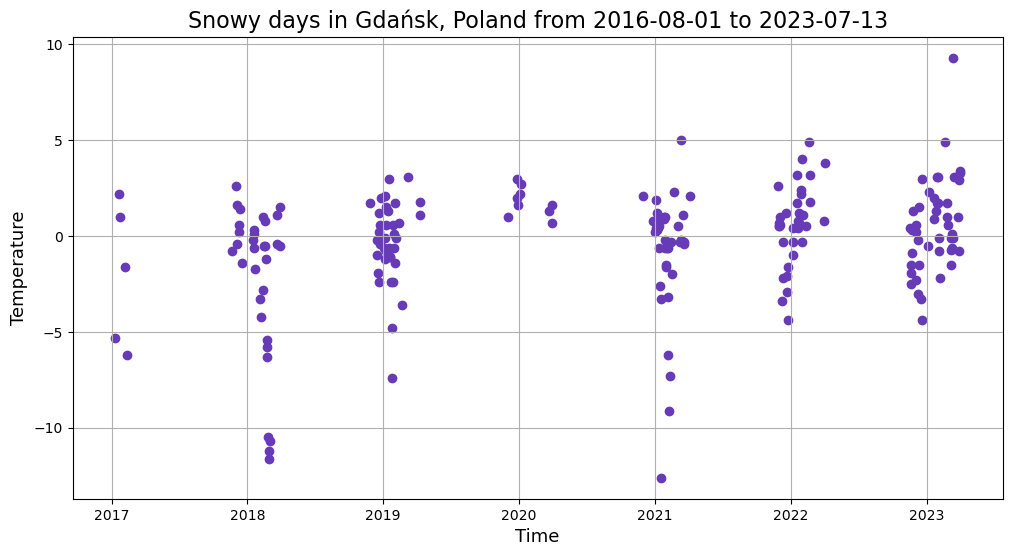

Percentage of snowy days in Gdansk: 8.0%


In [25]:
snow_counter = 0
plt.figure(figsize=(12, 6))
for i in range(len(data)):
    if(data['snow'][i] > 0):
        snow_counter += 1
        plt.scatter(x=data['datetime'][i], y=data['temp'][i], color='#673AB7')
plt.title(f"Snowy days in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Temperature', fontsize=13)
plt.grid()
plt.show()
print(f'Percentage of snowy days in Gdansk: {round((snow_counter / len(data) * 100), 2)}%')

In [18]:
print(np.where(data['snow'] > 0))

(array([ 162,  172,  176,  188,  194,  477,  487,  489,  490,  495,  496,
        497,  503,  534,  535,  536,  537,  538,  553,  554,  559,  560,
        564,  565,  566,  569,  570,  571,  572,  574,  575,  577,  578,
        597,  598,  605,  606,  848,  866,  867,  868,  871,  872,  873,
        874,  875,  876,  885,  887,  888,  889,  890,  891,  892,  897,
        898,  900,  901,  902,  903,  907,  908,  909,  910,  911,  913,
        914,  916,  917,  925,  935,  951,  982,  983, 1219, 1243, 1244,
       1245, 1252, 1253, 1329, 1337, 1338, 1582, 1608, 1615, 1616, 1617,
       1618, 1619, 1620, 1621, 1622, 1623, 1625, 1626, 1628, 1629, 1630,
       1638, 1639, 1640, 1641, 1642, 1643, 1644, 1647, 1648, 1649, 1650,
       1652, 1653, 1658, 1659, 1666, 1677, 1680, 1683, 1684, 1690, 1691,
       1692, 1709, 1946, 1947, 1948, 1949, 1951, 1952, 1957, 1958, 1959,
       1968, 1969, 1970, 1972, 1973, 1985, 1986, 1987, 1996, 1997, 1999,
       2000, 2001, 2002, 2007, 2008, 2009, 2011, 2

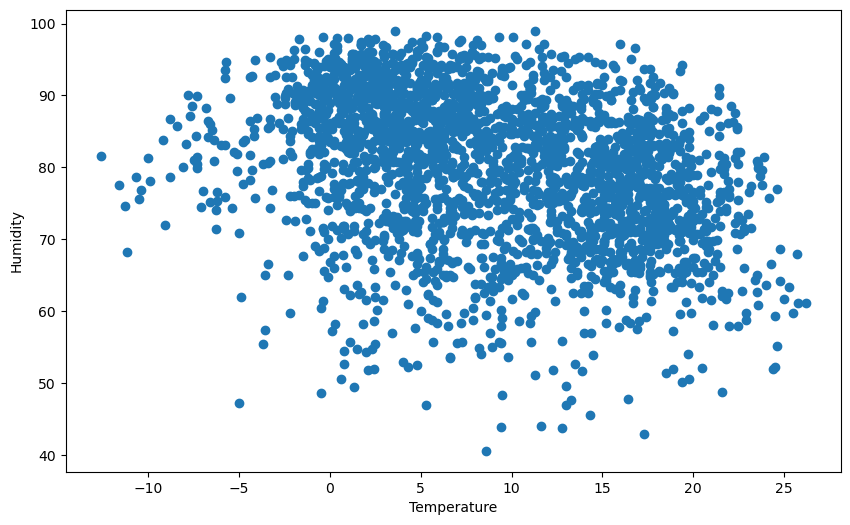

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['temp'], y=data['humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()